This experiment demonstrates the ROC curves plotted between 4 algorithms Logistic regression, SVM, Naive Bayes and Decision trees. The dataset used is Titanic dataset from kaggle.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv("E:/2020_Classes/DS/19AI611/python_data_csv/train.csv")
test = pd.read_csv("E:/2020_Classes/DS/19AI611/python_data_csv/test.csv")

In [5]:
train.head(-1)

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
885          886         0       3   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
885               Rice, Mrs. William (Margaret Norton)  female  39.0      0   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
885      5            382652  29.1250   NaN        Q  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  

[890 rows x 12 columns]

In [4]:
test.head(3)

PassengerId  Pclass                              Name     Sex   Age  SibSp  \
0          892       3                  Kelly, Mr. James    male  34.5      0   
1          893       3  Wilkes, Mrs. James (Ellen Needs)  female  47.0      1   
2          894       2         Myles, Mr. Thomas Francis    male  62.0      0   

   Parch  Ticket    Fare Cabin Embarked  
0      0  330911  7.8292   NaN        Q  
1      0  363272  7.0000   NaN        S  
2      0  240276  9.6875   NaN        Q

We had seen pre-processing steps before..NaN in Age

In [6]:
train["Age"] = train["Age"].fillna(train["Age"].median())
test["Age"] = test["Age"].fillna(test["Age"].median())

In [8]:
train = train.fillna({"Embarked": "S"}) #NA filled due to majority boarded from here

In [9]:
train["Pclass"] = train["Pclass"].fillna(train["Pclass"].mode())

In [10]:
train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)

In [11]:
train = train.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)

In [12]:
train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)

In [13]:
sex_mapping = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

In [14]:
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)


In [15]:
train = train.drop(['Fare'], axis = 1)
test = test.drop(['Fare'], axis = 1)

In [16]:
train = train.drop(['PassengerId'], axis = 1)

In [17]:
from sklearn.model_selection import train_test_split

X = train.drop(['Survived'], axis=1)
y = train["Survived"]
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [19]:
log_model = LogisticRegression()
nb_model = GaussianNB()
svc_model = SVC()
des_model = DecisionTreeClassifier(criterion="entropy")

In [20]:
models = [
    {
        'label': 'Logistic Regression',
        'model': log_model
    },
    {
        'label': 'Naive Bayes',
        'model': nb_model
    },
    {
        'label': 'Support Vector Machine',
        'model': svc_model
    },
    {
        'label': 'Decision Tree Classification',
        'model': des_model
    }
]

In [21]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

<Figure size 432x288 with 0 Axes>

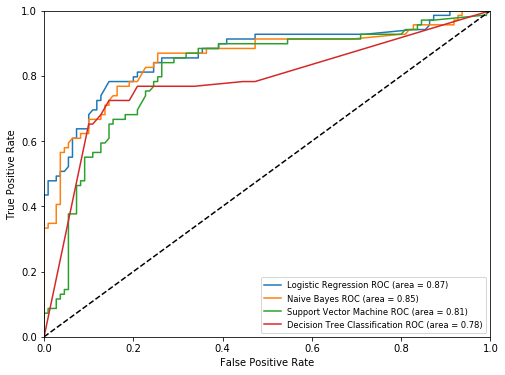

In [22]:
plt.clf()
plt.figure(figsize=(8,6))
for m in models:
    m['model'].probability = True
    probas = m['model'].fit(xtrain,ytrain).predict_proba(xtest)
    fpr, tpr, thresholds = roc_curve(ytest, probas[:, 1])
    roc_auc  = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=0, fontsize='small')
plt.show()